In [ ]:
%load_ext autoreload
%autoreload 2

In [7]:
import tensorflow as tf
import numpy as np

In [11]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
np.set_printoptions(precision=3, suppress=True)

In [4]:
import inspect
def print_t(t, full: bool = True):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    names = [var_name for var_name, var_val in callers_local_vars if var_val is t]
    if len(names) != 1:
        raise
    if full:
        print(f"{names[0]}{t.shape}", t.numpy(), sep='\n')
    else:
        print(f"{names[0]}{t.shape}")

In [32]:
from lib.network import Network
from parameters import p

net = Network.build(**p)
tdim = slice(0, 1)
sdim = p["sdim"]

In [34]:
from lib.layer import GradientLayer

layer = GradientLayer(net, print_debug=True, **p)

x = tf.constant([[ 1,  2,  3],
                 [ 4,  5,  6],
                 [ 7,  8,  9],
                 [10, 11, 12]], dtype=tf.float32)

layer.call(x)


c(4, 1)
[[-1.898]
 [-1.136]
 [-0.632]
 [-0.477]]
c_jac(4, 3)
[[ 0.255 -0.533  0.31 ]
 [ 0.779 -0.476 -0.007]
 [ 0.244 -0.289  0.13 ]
 [ 0.108 -0.17   0.092]]
c_t(4, 1)
[[0.255]
 [0.779]
 [0.244]
 [0.108]]
c_grd(4, 2)
[[-0.533  0.31 ]
 [-0.476 -0.007]
 [-0.289  0.13 ]
 [-0.17   0.092]]
v(4, 2)
[[-0.226 -1.279]
 [-0.306 -1.084]
 [-0.226 -0.886]
 [-0.191 -0.765]]
v_jac(4, 2, 3)
[[[-0.158  0.134  0.014]
  [ 0.596 -0.681  0.241]]

 [[ 0.063  0.019 -0.05 ]
  [ 0.007 -0.432  0.419]]

 [[ 0.023 -0.005 -0.002]
  [ 0.205 -0.29   0.147]]

 [[ 0.019  0.002 -0.013]
  [ 0.091 -0.174  0.108]]]
v_t(4, 2)
[[-0.158  0.596]
 [ 0.063  0.007]
 [ 0.023  0.205]
 [ 0.019  0.091]]
v_grd(4, 2, 2)
[[[ 0.134  0.014]
  [-0.681  0.241]]

 [[ 0.019 -0.05 ]
  [-0.432  0.419]]

 [[-0.005 -0.002]
  [-0.29   0.147]]

 [[ 0.002 -0.013]
  [-0.174  0.108]]]
v_div(4, 1)
[[0.375]
 [0.437]
 [0.142]
 [0.11 ]]
v_adv(4, 2)
[[-0.049 -0.154]
 [ 0.049 -0.321]
 [ 0.003 -0.065]
 [ 0.01  -0.049]]
Fi(4, 1)
[[-0.865]
 [-0.471]
 [-0.309]

(<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
 array([[-1.898],
        [-1.136],
        [-0.632],
        [-0.477]], dtype=float32)>,
 <tf.Tensor: shape=(4, 1), dtype=float32, numpy=
 array([[0.255],
        [0.779],
        [0.244],
        [0.108]], dtype=float32)>,
 <tf.Tensor: shape=(4, 2), dtype=float32, numpy=
 array([[-0.533,  0.31 ],
        [-0.476, -0.007],
        [-0.289,  0.13 ],
        [-0.17 ,  0.092]], dtype=float32)>,
 <tf.Tensor: shape=(4, 2), dtype=float32, numpy=
 array([[-0.226, -1.279],
        [-0.306, -1.084],
        [-0.226, -0.886],
        [-0.191, -0.765]], dtype=float32)>,
 <tf.Tensor: shape=(4, 2), dtype=float32, numpy=
 array([[-0.158,  0.596],
        [ 0.063,  0.007],
        [ 0.023,  0.205],
        [ 0.019,  0.091]], dtype=float32)>,
 <tf.Tensor: shape=(4, 1), dtype=float32, numpy=
 array([[0.375],
        [0.437],
        [0.142],
        [0.11 ]], dtype=float32)>,
 <tf.Tensor: shape=(4, 2), dtype=float32, numpy=
 array([[-0.049, -0.154],
   

In [ ]:
inputs = tf.keras.layers.Input(shape=(3,))
x = inputs
x = tf.keras.layers.Dense(10, activation=tf.keras.activations.sigmoid)(x)
x = tf.keras.layers.Dense(10, activation=tf.keras.activations.sigmoid)(x)
x = tf.keras.layers.Dense(10, activation=tf.keras.activations.sigmoid)(x)
outputs = [tf.keras.layers.Dense(0)(x), tf.keras.layers.Dense(3)(x)]
model = tf.keras.models.Model(inputs=inputs, outputs=outputs)


In [ ]:
train_input = np.random.rand(1000000, 3)*10

# print_t(f"train_input:{train_input}")
# print_t(np.sum(train_input, axis=1))
# print_t(np.stack([train_input[:, 0], (train_input[:, 0] + train_input[:, 1])/2, train_input[:, 1]]).T)

train_output = [
    np.sum(train_input, axis=1),
    np.stack([
        train_input[:, 1],
        (train_input[:, 0] + train_input[:, 1] - train_input[:, 2])*2,
        train_input[:, 0]+train_input[:, 2]]).T
]
# print_t(train_input[:, 1]*train_input[:, 0])
# print_t(f"train_output:{train_output}")
model.compile(optimizer='adam', loss='mse')
model.fit(train_input, train_output)

In [ ]:
test_input = np.array([[1.0, 2.0, 3.0]])

# print_t(model(np.array([[1.0,2.0]])))
# [np.sum(test_input, axis=1),
# np.stack([test_input[:, 0], (test_input[:, 0] + test_input[:, 1])*2, test_input[:, 1]*test_input[:, 0]])]

i = 5

print_t(train_input[i:i+1])
res = model(train_input[i:i+1])
print_t(res[0].numpy())
print_t(res[1].numpy())
print_t(train_output[0][i:i+1])
print_t(train_output[1][i:i+1])


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook
fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):
    line.set_ydata(np.sin(x + i / 50))  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, interval=20, blit=True, save_count=50)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()

In [ ]:
# Enable interactive plot
%matplotlib notebook
%matplotlib notebook

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [ ]:
fig, ax = plt.subplots()

line, = ax.plot([])

ax.set_xlim(0, 2*np.pi)
ax.set_ylim(-1.1, 1.1)

def animate(frame_num):
    y = np.sin(x + 2*np.pi * frame_num/100)
    line.set_data((x, y))
    return line

anim = FuncAnimation(fig, animate, frames=100, interval=5)
plt.show()

[Text(0.5, 1.0, 'Cumulative')]

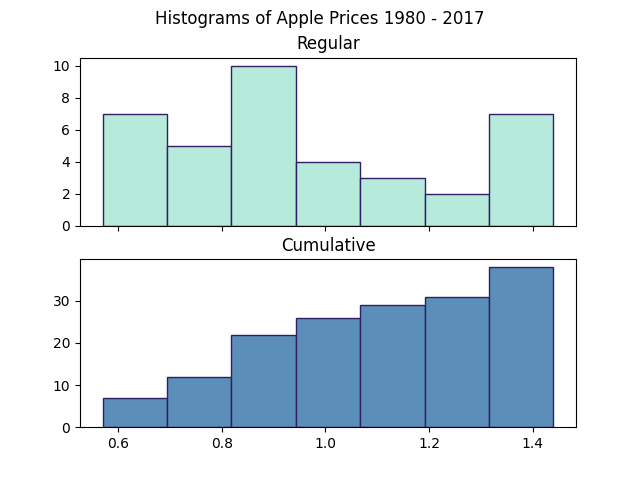

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib widget
d = np.array([1.29, 1.44, 1.36, 1.35, 1.39, 1.38, 1.35, 1.22, 1.18, 1.32, 1.12, 1.07, 0.95, 1.04, 0.98, 0.95, 0.87, 0.92, 0.90, 0.94, 0.91, 0.93, 0.83, 0.80, 0.83, 0.89, 0.89, 0.72, 0.69, 0.73, 0.73, 0.77, 0.68, 0.66, 0.59, 0.64, 0.57, 0.63])
fig, axs = plt.subplots(2, 1, 
                        sharey=False,
                        sharex=True)

axs[0].hist(d,
        bins='auto',
        edgecolor='#301E67',
        color='#B6EADA')
axs[1].hist(d,
        bins='auto',
        edgecolor='#301E67',
        color='#5B8FB9',
        cumulative=True)

fig.suptitle('Histograms of Apple Prices 1980 - 2017\n')
axs[0].set(title='Regular')
axs[1].set(title='Cumulative')

Text(0.5, 0.98, 'Fruit comparison in % of daily value')

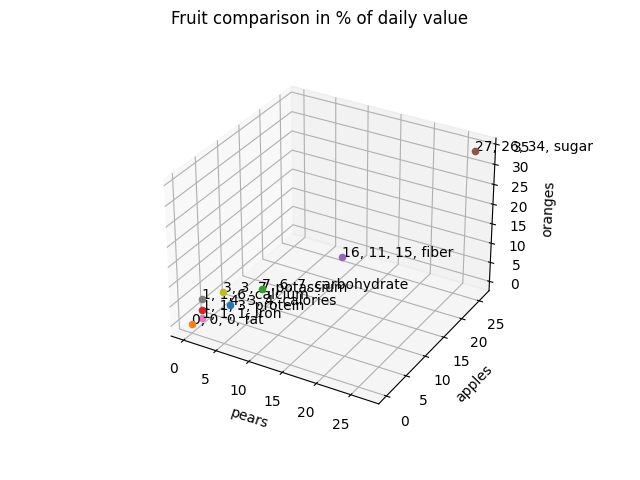

In [3]:
labels = np.array(['calories','fat','carbohydrate','protein','fiber','sugar', 'iron', 'calcium','potassium'])
x = np.array([4,0,7,1,16,27,1,1,3]) # pears
y = np.array([3,0,6,1,11,26,1,1,3]) # apples
z = np.array([4,0,7,3,15,34,1,6,7]) # oranges

points = list(zip(x, y, z, labels))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for pts in points:
    x = pts[0]
    y = pts[1]
    z = pts[2]
    label = f'{x}, {y}, {z}, {pts[3]}'
    ax.scatter(x, y, z)
    ax.text(x, y, z, label)

ax.set_xlabel('pears')
ax.set_ylabel('apples')
ax.set_zlabel('oranges')
fig.suptitle('Fruit comparison in % of daily value')